# Smoothed Particle Hydrodynamics

In this notebook the SPH dynamics will be explored, even in the limit of the trivial kernel (non-smoothed).

In [22]:
from copy import deepcopy

import numpy as np
import scipy.signal as signal

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
sns.set_style("ticks")

## Kernels

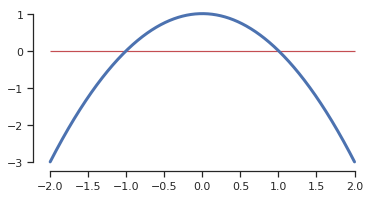

In [61]:
def plot_kernel(kernel=lambda x, h: 1 - (x/h)**2):
    plt.figure(figsize=(6, 3))
    xs = np.linspace(-2, 2, 1000)
    plt.plot(xs, np.vectorize(kernel, excluded=[1], otypes=[np.float64])(xs, 1.), lw=3)
    plt.hlines(0, min(xs), max(xs), colors="r", linestyles="-", linewidth=1.2)
    sns.despine(offset=2,trim=True)

plot_kernel()

**Trivial kernel**:

$$
W_0(\vec{r}, h) = \begin{cases}
1 \qquad &r < h\\
0 \qquad &\text{otherwise}
\end{cases}
$$

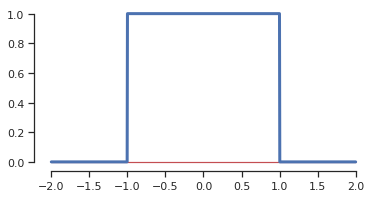

In [62]:
def w0(r, h):
    if abs(r) < h:
        return 1
    else:
        return 0
    
plot_kernel(w0)

**Truncated gaussian**:

$$
W_{gauss}^n(\vec{r}, h) = \begin{cases}
\exp\left(\frac{- r^2}{2 \left[h / (n+3)\right]^2}\right) \qquad &r< h\\
0 \qquad &\text{otherwise}
\end{cases}
$$

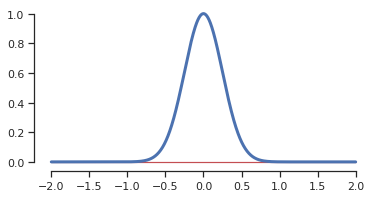

In [68]:
def wgauss(r, h, n=1):
    if abs(r) < h:
        return np.exp(- r**2 / (2 * (h/(n+3))**2))
    else:
        return 0
    
plot_kernel(wgauss)

**Cubic spline**:

$$
W_{cubic}(\vec{r}, h) = \begin{cases}
\sigma_3 \left[ 1 - \frac{3}{2}r^2 \left(1-\frac{r}{2}\right)\right] \qquad &0 \le r \le h\\
\frac{\sigma_3}{4} (2 - r)^3\qquad &h \le r \le 2h\\
0 \qquad &\text{otherwise}
\end{cases}
$$

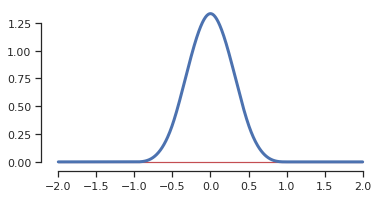

In [74]:
def wcubic(r, h):
    # convert h such that the support is in abs(r/h) < 1
    h = h / 2
    
    # define conventional quantities
    sigma3 = 2 / (3 * h) # 1D
    #sigma3 = 10 / (7 * np.pi * h**2) # 2D
    #sigma3 = 1 / (np.pi * h**3) # 3D
    
    q = abs(r) / h
    
    # compute spline
    if abs(r) < h:
        return sigma3 * ( 1 - (3/2) * q**2 * (1 - q/2) )
    elif abs(r) < 2*h:
        return (sigma3/4) * (2-q)**3
    else:
        return 0
    
plot_kernel(wcubic)